In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# GEX

In [3]:
clusts = open('../../data/ref/cluster_list.txt').read().split('\n')

In [4]:
test_types = !ls ../../data/outputs/gex_de_results/

In [5]:
def list_intersection(to_intersect):
    common = to_intersect[0]
    for item in to_intersect[1:]:
        common = np.intersect1d(common, item)
    return common

In [6]:
tests = ['lrt']

In [7]:
species = ['human', 'macaque', 'marmoset', 'mouse']

In [8]:
in_f = "../../data/outputs/atac_de_results/{0}/{4}/{1}_v_{2}_{3}.tsv"

In [9]:
out_f = '../../data/outputs/atac_de_results/{0}/{3}/aggregate/{1}_v_{2}_logfc.tsv'

# check stuff

In [10]:
pairs_use = [('human', 'macaque'), ('human', 'marmoset'), ('human', 'mouse'), ('macaque', 'marmoset'), ('macaque', 'mouse'), ('marmoset', 'mouse')]

In [12]:
in_f.format(test, spec1, spec2, clust)

IndexError: Replacement index 4 out of range for positional args tuple

In [13]:
test, spec1, spec2, clust

('lrt', 'human', 'macaque', 'ASC')

In [ ]:
# in_f.format(test, spec1, spec2, clust)

IndexError: Replacement index 4 out of range for positional args tuple

In [21]:
tables = []
names = []
test = 'lrt'
origin = 'human_origin'
for pair in pairs_use:
    spec1, spec2 = pair
    if 'human' in pair:
    
        dfs = []
        for clust in clusts:
            f_use = in_f.format(origin, spec1, spec2, clust, test, )
            dfs.append(pd.read_csv(f_use, sep='\t')[['logFC',
                                                     'FDR']].rename(
                                                                columns={'logFC': 'logFC_{}'.format(clust),
                                                                            'FDR' : 'FDR_{}'.format(clust)})
                      )
        df_out = pd.concat(dfs, axis=1)
        tables.append(df_out)
        names.append('{}_v_{}'.format(spec1, spec2))
    else:
        continue

In [23]:
!mkdir -p ../../data/processed/for_figures

In [24]:
lfc_table = [df[[i for i in df.columns if 'logFC' in i]] for df in tables]

In [25]:
p_val_table = [df[[i for i in df.columns if 'FDR' in i]] for df in tables]

In [26]:
idx = lfc_table[0].index

In [27]:
p_val_table =  pd.DataFrame(np.minimum.reduce([df.loc[idx].apply(np.log10).to_numpy() * -1 for df in p_val_table]), columns=p_val_table[0].columns, index=p_val_table[0].index)

In [28]:
lfc_table = pd.DataFrame(np.minimum.reduce([df.loc[idx].to_numpy() for df in lfc_table]), columns=lfc_table[0].columns, index=lfc_table[0].index)

In [29]:
p_val_table.to_csv('../../data/processed/for_figures/human_peak_minumum_negative_log10_fdr.tsv', sep='\t')
lfc_table.to_csv('../../data/processed/for_figures/human_peak_minumum_lfc.tsv', sep='\t')

# aggregate fold change PEAKS

In [9]:
spec_use = species + ['all']

In [10]:
for origin in ['primate_conserved']:
    for test in tests:
        for spec1 in species[:3]:
            for spec2 in spec_use[:3]:
                if spec1 == spec2:
                    continue
                dfs = []
                for clust in clusts:
                    f_use = in_f.format(origin, spec1, spec2, clust, test)
                    dat = pd.read_csv(f_use, sep='\t')
                    dfs.append(dat['logFC'])
                    # !wc -l $f_use
                df_out = pd.concat(dfs, axis=1)
                df_out.columns = clusts
                df_out.to_csv(out_f.format(origin, spec1, spec2, test), sep='\t')

In [11]:
!wc -l ../../data/outputs/atac_de_results/primate_conserved/lrt/human_v_macaque_*.tsv

    24263 ../../data/outputs/atac_de_results/primate_conserved/lrt/human_v_macaque_ASC.tsv
     3527 ../../data/outputs/atac_de_results/primate_conserved/lrt/human_v_macaque_ChC.tsv
     5046 ../../data/outputs/atac_de_results/primate_conserved/lrt/human_v_macaque_Endo.tsv
   125679 ../../data/outputs/atac_de_results/primate_conserved/lrt/human_v_macaque_L2_3_IT.tsv
    96165 ../../data/outputs/atac_de_results/primate_conserved/lrt/human_v_macaque_L4_5_IT.tsv
    17746 ../../data/outputs/atac_de_results/primate_conserved/lrt/human_v_macaque_L5_6_NP.tsv
    27857 ../../data/outputs/atac_de_results/primate_conserved/lrt/human_v_macaque_L5_ET.tsv
    94205 ../../data/outputs/atac_de_results/primate_conserved/lrt/human_v_macaque_L5_IT.tsv
    33328 ../../data/outputs/atac_de_results/primate_conserved/lrt/human_v_macaque_L6b.tsv
    69546 ../../data/outputs/atac_de_results/primate_conserved/lrt/human_v_macaque_L6_CT.tsv
     9242 ../../data/outputs/atac_de_results/primate_conserved/lrt/huma

In [12]:
!ls ../../data/outputs/atac_de_results/primate_conserved/aggregate/

ls: cannot access '../../data/outputs/atac_de_results/primate_conserved/aggregate/': No such file or directory


In [13]:
!wc -l ../../data/outputs/atac_de_results/primate_conserved/aggregate/human_v_all_logfc.tsv

wc: ../../data/outputs/atac_de_results/primate_conserved/aggregate/human_v_all_logfc.tsv: No such file or directory


# count and visualize peaks/cell

# may update later for great? seems like too much of a pain though

In [14]:
out_go_pair = '../../data/processed/da_peak_list/primate_conserved/pairwise/{0}_v_{1}_{2}_{3}_test_{4}.txt'
out_go_specific = '../../data/processed/da_peak_list/primate_conserved/{1}_spec_{2}_{3}.txt'

In [15]:
def save_list(outfile, listlike):
    '''
    writes a file as a newline seperated list, useful for gsea, or storing information in general
    
    args:
        outfile : a file path to write a list of genes
        listline : an interatable object like a python list, or a numpy array
    
    
    '''
    return open(outfile, 'w').write(''.join([i + '\n' for i in listlike]).strip('\n'))

In [16]:
def subset_orthologs(df_, ortholog_table, specie):
    df_use = df_.reindex(ortholog_table[specie])
    df_use.index = ortholog_table['human']
    return df_use

In [17]:
# percent_path = '../../data/processed/atac_percent_accesible/' + origin + '_origin/{}/all_percent_aggregate.tsv'

In [18]:
# pd.read_csv(percent_path.format('human'), sep='\t').max()

In [19]:
fdr_thresh = .001/120
nums = []
for origin in ['primate_conserved']:
    # orthologs = pd.read_csv('../../data/ref/{}_origin_ortholog_elements.tsv'.format(origin), sep='\t')
    # percent_path = '../../data/processed/atac_percent_accesible/' + origin + '_origin/{}/all_percent_aggregate.tsv'
    # percent_expressed = {specie : subset_orthologs(pd.read_csv(percent_path.format(specie),
    #                             sep='\t').set_index('Unnamed: 0'), orthologs, specie) for specie in species}
    for test in tests:
        for clust in clusts:
            for spec1 in species[:3]:
                spec_list_up = []
                spec_list_down = []
                spec_list_mixed = []
                # spec1_percent = percent_expressed[spec1][clust]
                for spec2 in species[:3]:
                    # print(spec1, spec2)
                    if spec1 == spec2:
                        continue
                    # spec2_percent = percent_expressed[spec2][clust]
                    
                    f_use = in_f.format(origin, spec1, spec2, clust, test)
                    dat = pd.read_csv(f_use, sep='\t')
                    sig_up = dat.index[(dat.FDR < fdr_thresh) & (dat.logFC > 1)].values.tolist()
                    # sig_up = spec1_percent.index[(spec1_percent > .01) & spec1_percent.index.isin(sig_up)].values.tolist()
                    sig_down = dat.index[(dat.FDR < fdr_thresh) & (dat.logFC < -1)].values.tolist()
                    # sig_down = spec2_percent.index[(spec2_percent > .01) & spec2_percent.index.isin(sig_down)].values.tolist()
                    # print('here')
                    spec_list_up.append(sig_up)
                    spec_list_down.append(sig_down)
                    spec_list_mixed.append(sig_up + sig_down)
  
                species_spec_up = list_intersection(spec_list_up)
                species_spec_down = list_intersection(spec_list_down)
                species_spec_mixed = np.setdiff1d(np.setdiff1d(list_intersection(spec_list_mixed),
                                                  species_spec_up),
                                                  species_spec_down)
                save_list(out_go_specific.format(origin, spec1, clust, 'up'), species_spec_up)
                save_list(out_go_specific.format(origin, spec1, clust, 'down'), species_spec_down)
                save_list(out_go_specific.format(origin, spec1, clust, 'mixed'), species_spec_mixed)
                print(spec1)
                nums.append([clust, origin, spec1, test, len(species_spec_up), len(species_spec_down), len(species_spec_mixed)])
            background = dat.index.values
            # save_list(bg_genes.format(clust), background)

human
macaque
marmoset
human
macaque
marmoset
human
macaque
marmoset
human
macaque
marmoset
human
macaque
marmoset
human
macaque
marmoset
human
macaque
marmoset
human
macaque
marmoset
human
macaque
marmoset
human
macaque
marmoset
human
macaque
marmoset
human
macaque
marmoset
human
macaque
marmoset
human
macaque
marmoset
human
macaque
marmoset
human
macaque
marmoset
human
macaque
marmoset
human
macaque
marmoset
human
macaque
marmoset
human
macaque
marmoset
human
macaque
marmoset


In [32]:
fdr_thresh = .001/120
nums = []
out_go_specific = '../../data/processed/da_peak_list/human_4fold/primate/{1}_spec_{2}_{3}.txt'
for origin in ['primate_conserved']:
    # orthologs = pd.read_csv('../../data/ref/{}_origin_ortholog_elements.tsv'.format(origin), sep='\t')
    # percent_path = '../../data/processed/atac_percent_accesible/' + origin + '_origin/{}/all_percent_aggregate.tsv'
    # percent_expressed = {specie : subset_orthologs(pd.read_csv(percent_path.format(specie),
    #                             sep='\t').set_index('Unnamed: 0'), orthologs, specie) for specie in species}
    for test in tests:
        for clust in clusts:
            for spec1 in ['human']:
                spec_list_up = []
                spec_list_down = []
                spec_list_mixed = []
                # spec1_percent = percent_expressed[spec1][clust]
                for spec2 in species[:3]:
                    # print(spec1, spec2)
                    if spec1 == spec2:
                        continue
                    # spec2_percent = percent_expressed[spec2][clust]
                    
                    f_use = in_f.format(origin, spec1, spec2, clust, test)
                    dat = pd.read_csv(f_use, sep='\t')
                    sig_up = dat.index[(dat.FDR < fdr_thresh) & (dat.logFC > 2)].values.tolist()
                    # sig_up = spec1_percent.index[(spec1_percent > .01) & spec1_percent.index.isin(sig_up)].values.tolist()
                    sig_down = dat.index[(dat.FDR < fdr_thresh) & (dat.logFC < -2)].values.tolist()
                    # sig_down = spec2_percent.index[(spec2_percent > .01) & spec2_percent.index.isin(sig_down)].values.tolist()
                    # print('here')
                    spec_list_up.append(sig_up)
                    spec_list_down.append(sig_down)
                    spec_list_mixed.append(sig_up + sig_down)
  
                species_spec_up = list_intersection(spec_list_up)
                species_spec_down = list_intersection(spec_list_down)
                species_spec_mixed = np.setdiff1d(np.setdiff1d(list_intersection(spec_list_mixed),
                                                  species_spec_up),
                                                  species_spec_down)
                save_list(out_go_specific.format(origin, spec1, clust, 'up'), species_spec_up)
                save_list(out_go_specific.format(origin, spec1, clust, 'down'), species_spec_down)
                save_list(out_go_specific.format(origin, spec1, clust, 'mixed'), species_spec_mixed)
                print(spec1)
                nums.append([clust, origin, spec1, test, len(species_spec_up), len(species_spec_down), len(species_spec_mixed)])
            background = dat.index.values
            # save_list(bg_genes.format(clust), background)

human
human
human
human
human
human
human
human
human
human
human
human
human
human
human
human
human
human
human
human
human


In [20]:
h_up_peaks = out_go_specific.format(origin, 'human', '*', 'up')
h_peaks = !cat $h_up_peaks | sort

In [21]:
len(pd.Series(h_peaks).value_counts().index[pd.Series(h_peaks).value_counts() > 10])

26

In [22]:
len(pd.Series(h_peaks).value_counts().index[pd.Series(h_peaks).value_counts() > 10])

26

In [23]:
pd.Series(h_peaks).value_counts().index[pd.Series(h_peaks).value_counts() > 10]

Index(['chr7-64794118-64794617', 'chr4-68373459-68373958',
       'chr6-169212963-169213462', 'chr17-20320594-20321093',
       'chr1-2189451-2189950', 'chr13-51760563-51761062',
       'chr15-100350021-100350520', 'chr5-95834638-95835137',
       'chr3-128845686-128846185', 'chr19-58347412-58347911',
       'chr16-89256801-89257300', 'chr8-26190286-26190785',
       'chr6-29942184-29942683', 'chr19-11987388-11987887',
       'chr8-94119975-94120474', 'chr11-134276206-134276705',
       'chr14-93231337-93231836', 'chr19-22633972-22634471',
       'chr9-90102221-90102720', 'chr8-143038742-143039241',
       'chr10-45419254-45419753', 'chr14-104820641-104821140',
       'chr2-85637437-85637936', 'chr6-75290513-75291012',
       'chr15-99100439-99100938', 'chr17-43720606-43721105'],
      dtype='object')

In [24]:
overview = pd.DataFrame(nums, columns = ['cell_type', 'origin', 'species', 'test', 'num_up', 'num_down', 'num_mixed'])

In [25]:
overview.head()

,cell_type,origin,species,test,num_up,num_down,num_mixed
0,ASC,primate_conserved,human,lrt,1508,254,34
1,ASC,primate_conserved,macaque,lrt,435,224,38
2,ASC,primate_conserved,marmoset,lrt,653,909,26
3,ChC,primate_conserved,human,lrt,23,13,1
4,ChC,primate_conserved,macaque,lrt,21,19,0


In [26]:
overview.loc[(overview.species =='human') & (overview.origin == 'human')].num_up.sum()

0

In [27]:
overview.to_csv('../../data/meta/atac_count_species_spec_de.tsv', sep='\t')

Text(0.5, 1.0, 'DE genes in each human cell type')

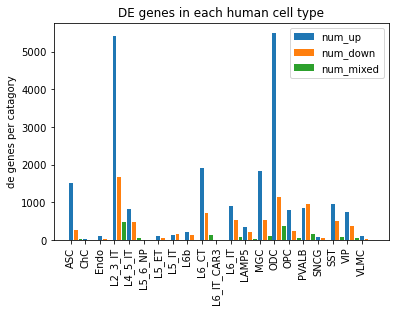

In [28]:
use = overview.loc[(overview.species =='human')]
count = 0
for catagory in ['num_up', 'num_down', 'num_mixed']:
    plt.bar(np.arange(0, 63, 3) + count, use[catagory].values, label=catagory)
    count+= 1
ticks = plt.xticks(np.arange(0, 63, 3), labels= clusts, rotation=90)
plt.ylabel('de genes per catagory')
plt.legend()
plt.title('DE genes in each human cell type')

Text(0.5, 1.0, 'DE genes in each human cell type')

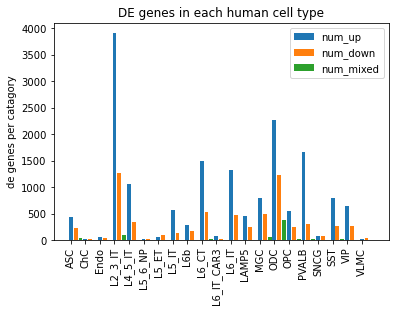

In [29]:
use = overview.loc[(overview.species =='macaque')]
count = 0
for catagory in ['num_up', 'num_down', 'num_mixed']:
    plt.bar(np.arange(0, 63, 3) + count, use[catagory].values, label=catagory)
    count+= 1
ticks = plt.xticks(np.arange(0, 63, 3), labels= clusts, rotation=90)
plt.ylabel('de genes per catagory')
plt.legend()
plt.title('DE genes in each human cell type')

Text(0.5, 1.0, 'DE genes in each human cell type')

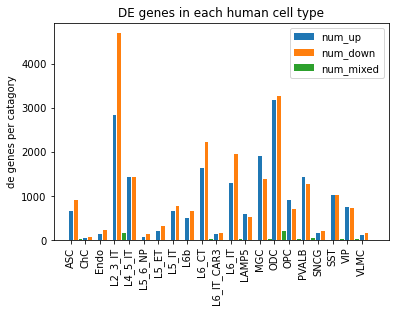

In [30]:
use = overview.loc[(overview.species =='marmoset')]
count = 0
for catagory in ['num_up', 'num_down', 'num_mixed']:
    plt.bar(np.arange(0, 63, 3) + count, use[catagory].values, label=catagory)
    count+= 1
ticks = plt.xticks(np.arange(0, 63, 3), labels= clusts, rotation=90)
plt.ylabel('de genes per catagory')
plt.legend()
plt.title('DE genes in each human cell type')